In [4]:
# data
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

# Multi-Class Classification

In the previous lectures we learned about how to use logistic regression to perform a binary classification. In many real life situations, we actually need to classify data into multiple classes:

    1.) Introduction to the Iris Data Set
    2.) Introduction to Multi-Class Classification (Logistic Regression)
    3.) Data Formatting
    4.) Data Visualization Analysis
    5.) Multi-Class Classification with Sci Kit Learn
    6.) Explanation of K Nearest Neighbors
    7.) K Nearest Neighbors with Sci Kit Learn
    8.) Conclusion

### Part 1: Introduction to the Iris Data Set

For this series of lectures, we will be using the famous [Iris flower data set](http://en.wikipedia.org/wiki/Iris_flower_data_set). The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.

### Part 2: Introduction to Multi-Class Classification (Logisitic Regression)

For each class, analyze and and do binary classification for each class vs the rest of the classes. Repeat for each class. Andrew Ng explains in his video. Use the class with the highest confidence for testing.

### Part 3: Data Formatting

In [5]:
# load data from scikit learn
from sklearn import linear_model
from sklearn.datasets import load_iris

iris = load_iris()
x3 = iris.data
y3 = iris.target

print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [6]:
# put data in pandas DataFrame
iris_data = DataFrame(x3,columns=['Sepal Length','Sepal Width',
                                 'Petal Length','Petal Width'])

iris_target = DataFrame(y3,columns=['Species'])
iris_target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [7]:
# species are 0,1,2 and we want names so write a function
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolor'
    else:
        return 'Virginica'
    
# apply new function
iris_target['Species'] = iris_target['Species'].apply(flower)
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [8]:
# one DataFrame with x and y
iris = pd.concat([iris_data,iris_target],axis=1)
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Part 4: Data Visualization Analysis

/Users/alenamclucas/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


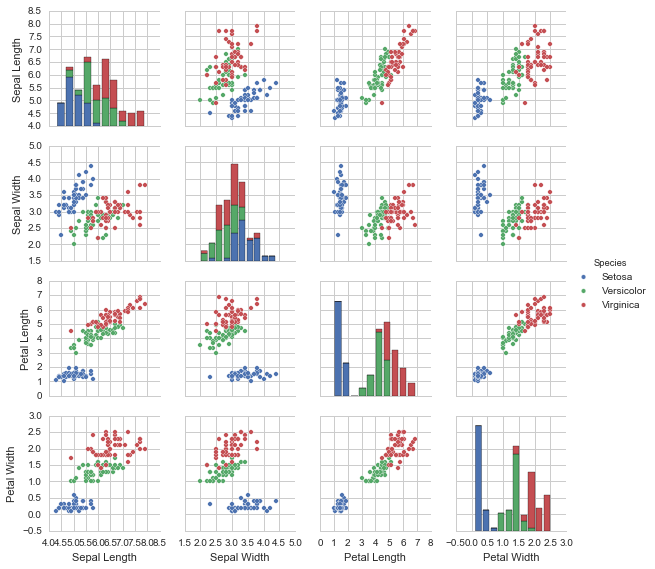

In [9]:
# shows us that Setosa is very distinct
sns.pairplot(iris,hue='Species',size=2)

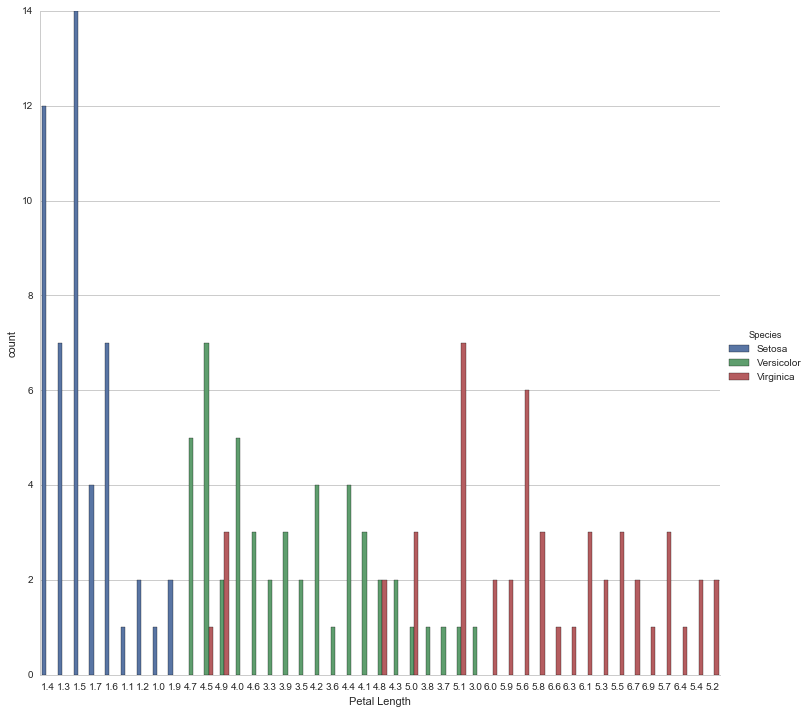

In [10]:
# find right code to order x-axis properly
sns.factorplot('Petal Length',data=iris,hue='Species',size=10,kind='count',
               col_order='Petal Length')

### Step 5: Multi-Class Classification with SciKit Learn

X and Y are already defined as the Data Features and Target. Then split the data into Testing and Training sets. Pass a test_size argument to have the testing data be 40% of the total data set and also pass a random seed number.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# create a Logistic Regression Class object
logreg = LogisticRegression()

# train/test set split
X_train, X_test, Y_train, Y_test = train_test_split(x3,y3,test_size=0.4,
                                                    random_state=3)

# train the model
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
# test the training model's accuracy
from sklearn import metrics

# predictions given X test data
Y_pred = logreg.predict(X_test)

# model predicts species at about 93% accuracy
# could change your train/test split to try to improve accuracy
print metrics.accuracy_score(Y_test,Y_pred)

0.933333333333


### Step 6: K-Nearest Neighbors

Learn about the k-nearest neighbors algorithm.

### Step 7: kNN with SciKit Learn

In [15]:
# use k-nearest neighbors classification
# Imagine two classes in our training set, A and B. We have to classify a
# new data point in our testing data. Expand a specific distance away from
# our feature space until we hit k number of other data points. For a
# binary classification using this method, choose an odd number for k to
# avoid the case of a "tied" distance between two classes.
from sklearn.neighbors import KNeighborsClassifier

In [16]:
# create KNeighborsClassifier object and set k = 6
knn = KNeighborsClassifier(n_neighbors = 6)

# fit training data
knn.fit(X_train,Y_train)

# predictions given X test data
Y_pred = knn.predict(X_test)

# model predicts species at about 95% accuracy
print metrics.accuracy_score(Y_test,Y_pred)

0.95


In [17]:
# set k = 1
knn = KNeighborsClassifier(n_neighbors=1)

# fit training data
knn.fit(X_train,Y_train)

# predictions given X test data
Y_pred = knn.predict(X_test)

# model predicts species at about 97% accuracy
print metrics.accuracy_score(Y_test,Y_pred)

0.966666666667


In [18]:
# cycle through k values to see which k is best
# can't always do this is the dataset is very large
k_range = range(1,21)

accuracy = []

In [19]:
# for each k value in k_range
for k in k_range:
    
    # initialize KNeighbors object
    knn = KNeighborsClassifier(n_neighbors=k)
    # fit training data
    knn.fit(X_train,Y_train)
    # predictions given X test data
    Y_pred = knn.predict(X_test)
    
    # append accuracy score to accuracy list
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

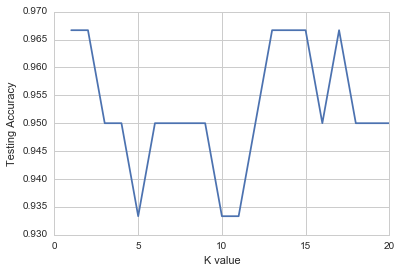

In [20]:
# plot k on x-axis and accuracy on y-axis
plt.plot(k_range,accuracy)
plt.xlabel('K value')
plt.ylabel('Testing Accuracy')